In [72]:
## 새로 변경된 Clarke Wright 방식 적용하여 holmes parker 방식 구현하기

import sys
sys.path.append('C:/Users/james/OneDrive/바탕 화면/대학교/수업/2024-1/물류관리/Term_project/Modules')

import pandas as pd
import numpy as np
from tqdm import tqdm
from itertools import combinations
import matplotlib.pyplot as plt
import copy
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

from utils import *

from savings.link import Link
from savings.node import Node
from savings.graph import Graph
from savings.SavingsModel import SavingsModel

from savings.SavingsAlgorithm import Clarke_Wright_Savings

In [74]:
DEPOT_INDEX = 0
COST_TYPE = 'trafast'
JSON_PATH = './../../Data/routes_with_depot'
mu = 800
std = 180
ub = 800

node_data = pd.read_csv('./../../Data/data_with_depot.csv')

In [75]:
# 문제 상황에 대한 Graph 객체 만들기
g = Graph()

# Node 등록
for row in node_data.iterrows():
    data = row[1]

    # Node의 demand 생성 로직
    machine_num = data['machine']
    node_demand = 0
    # 기기수만큼 정규분포에서 랜덤 샘플링을 진행하여 더해줌
    while(machine_num != 0):
        node_demand += np.random.normal(mu, std)
        machine_num -= 1
    node_demand = round(node_demand)
    if node_demand < 0:
        node_demand = 0
    if node_demand > ub*data['machine']:
        node_demand = ub*data['machine']
    

    # Node 생성 후 등록
    n = Node(data['index'], data['longitude'], data['latitude'], node_demand)
    g.add_node(n)

# Link 등록
for n1, n2 in tqdm([comb for comb in combinations(g.nodes, 2)]):
    if n1.index > n2.index:
        temp = n2
        n2 = n1
        n1 = temp

    link_cost = get_cost(n1.index, n2.index, COST_TYPE, JSON_PATH, toll_include=True)
    l = Link(n1, n2, link_cost)
    g.add_link(l)

# 임시: depot의 demand는 0으로 설정
g.get_node(DEPOT_INDEX).demand = 0

100%|██████████| 2145/2145 [00:13<00:00, 153.84it/s]


In [76]:
DEPOT_INDEX = 0
CAPA = 33000
JSON_PATH = './../../Data/routes_with_depot'

svm = SavingsModel(g, DEPOT_INDEX)
svm.calculate_savings()

temp_svm = copy.deepcopy(svm)

temp_svm.apply_algorithm(CAPA, Clarke_Wright_Savings)
min_cost = temp_svm.cost
min_idx = 0

print("Starting with", min_cost)

for i in range(500):
    first_key = next(iter(temp_svm.savings))
    del temp_svm.savings[first_key]

    temp_svm.apply_algorithm(CAPA, Clarke_Wright_Savings)

    if temp_svm.cost < min_cost:
        print(f'Better solution found, Top {i+1} deleted, cost {temp_svm.cost}')
        min_idx = i
        min_cost = temp_svm.cost

SavingsModel initialized
Calculating savings for 65 nodes, 
[Depot node] Node 0 (127.0742785, 35.01668803) : Demand 0


100%|██████████| 2080/2080 [00:00<00:00, 4951.47it/s]


Iterating through the savings info ...


100%|██████████| 2080/2080 [00:00<00:00, 83007.32it/s]


Starting with 104905
Iterating through the savings info ...


100%|██████████| 2079/2079 [00:00<00:00, 98048.66it/s]


Iterating through the savings info ...


100%|██████████| 2078/2078 [00:00<00:00, 86483.93it/s]


Better solution found, Top 2 deleted, cost 104817
Iterating through the savings info ...


100%|██████████| 2077/2077 [00:00<00:00, 75272.34it/s]


Iterating through the savings info ...


100%|██████████| 2076/2076 [00:00<00:00, 107301.08it/s]


Iterating through the savings info ...


100%|██████████| 2075/2075 [00:00<00:00, 69045.46it/s]


Iterating through the savings info ...


100%|██████████| 2074/2074 [00:00<00:00, 71688.64it/s]


Iterating through the savings info ...


100%|██████████| 2073/2073 [00:00<00:00, 95361.68it/s]


Iterating through the savings info ...


100%|██████████| 2072/2072 [00:00<00:00, 64714.19it/s]


Iterating through the savings info ...


100%|██████████| 2071/2071 [00:00<00:00, 46038.97it/s]


Iterating through the savings info ...


100%|██████████| 2070/2070 [00:00<00:00, 76751.53it/s]


Iterating through the savings info ...


100%|██████████| 2069/2069 [00:00<00:00, 97581.44it/s]


Iterating through the savings info ...


100%|██████████| 2068/2068 [00:00<00:00, 84403.60it/s]


Iterating through the savings info ...


100%|██████████| 2067/2067 [00:00<00:00, 72895.04it/s]


Iterating through the savings info ...


100%|██████████| 2066/2066 [00:00<00:00, 57533.28it/s]


Iterating through the savings info ...


100%|██████████| 2065/2065 [00:00<00:00, 53188.31it/s]


Iterating through the savings info ...


100%|██████████| 2064/2064 [00:00<00:00, 55744.72it/s]


Iterating through the savings info ...


100%|██████████| 2063/2063 [00:00<00:00, 59926.93it/s]


Iterating through the savings info ...


100%|██████████| 2062/2062 [00:00<00:00, 70326.27it/s]


Iterating through the savings info ...


100%|██████████| 2061/2061 [00:00<00:00, 83379.57it/s]


Iterating through the savings info ...


100%|██████████| 2060/2060 [00:00<00:00, 65045.10it/s]


Iterating through the savings info ...


100%|██████████| 2059/2059 [00:00<00:00, 76812.88it/s]


Iterating through the savings info ...


100%|██████████| 2058/2058 [00:00<00:00, 75966.11it/s]

Iterating through the savings info ...



100%|██████████| 2057/2057 [00:00<00:00, 95723.82it/s]


Iterating through the savings info ...


100%|██████████| 2056/2056 [00:00<00:00, 69225.49it/s]


Iterating through the savings info ...


100%|██████████| 2055/2055 [00:00<00:00, 73185.04it/s]


Iterating through the savings info ...


100%|██████████| 2054/2054 [00:00<00:00, 80325.03it/s]


Iterating through the savings info ...


100%|██████████| 2053/2053 [00:00<00:00, 68434.49it/s]


Iterating through the savings info ...


100%|██████████| 2052/2052 [00:00<00:00, 80189.25it/s]


Iterating through the savings info ...


100%|██████████| 2051/2051 [00:00<00:00, 72213.00it/s]


Iterating through the savings info ...


100%|██████████| 2050/2050 [00:00<00:00, 73539.60it/s]


Iterating through the savings info ...


100%|██████████| 2049/2049 [00:00<00:00, 78643.20it/s]


Iterating through the savings info ...


100%|██████████| 2048/2048 [00:00<00:00, 71284.58it/s]


Iterating through the savings info ...


100%|██████████| 2047/2047 [00:00<00:00, 73668.89it/s]


Iterating through the savings info ...


100%|██████████| 2046/2046 [00:00<00:00, 67431.06it/s]


Iterating through the savings info ...


100%|██████████| 2045/2045 [00:00<00:00, 89631.25it/s]


Iterating through the savings info ...


100%|██████████| 2044/2044 [00:00<00:00, 63452.70it/s]


Iterating through the savings info ...


100%|██████████| 2043/2043 [00:00<00:00, 55890.50it/s]


Iterating through the savings info ...


100%|██████████| 2042/2042 [00:00<00:00, 53729.61it/s]


Iterating through the savings info ...


100%|██████████| 2041/2041 [00:00<00:00, 66108.91it/s]


Iterating through the savings info ...


100%|██████████| 2040/2040 [00:00<00:00, 67137.30it/s]


Iterating through the savings info ...


100%|██████████| 2039/2039 [00:00<00:00, 66996.62it/s]


Iterating through the savings info ...


100%|██████████| 2038/2038 [00:00<00:00, 77769.82it/s]


Iterating through the savings info ...


100%|██████████| 2037/2037 [00:00<00:00, 85996.95it/s]


Iterating through the savings info ...


100%|██████████| 2036/2036 [00:00<00:00, 71306.57it/s]


Iterating through the savings info ...


100%|██████████| 2035/2035 [00:00<00:00, 74830.00it/s]


Iterating through the savings info ...


100%|██████████| 2034/2034 [00:00<00:00, 86185.20it/s]


Iterating through the savings info ...


100%|██████████| 2033/2033 [00:00<00:00, 82030.01it/s]


Iterating through the savings info ...


100%|██████████| 2032/2032 [00:00<00:00, 74954.93it/s]


Iterating through the savings info ...


100%|██████████| 2031/2031 [00:00<00:00, 87206.90it/s]


Iterating through the savings info ...


100%|██████████| 2030/2030 [00:00<00:00, 86687.41it/s]


Iterating through the savings info ...


100%|██████████| 2029/2029 [00:00<00:00, 90121.28it/s]


Iterating through the savings info ...


100%|██████████| 2028/2028 [00:00<00:00, 71407.99it/s]


Iterating through the savings info ...


100%|██████████| 2027/2027 [00:00<00:00, 74496.64it/s]


Iterating through the savings info ...


100%|██████████| 2026/2026 [00:00<00:00, 67478.16it/s]


Iterating through the savings info ...


100%|██████████| 2025/2025 [00:00<00:00, 86280.63it/s]


Iterating through the savings info ...


100%|██████████| 2024/2024 [00:00<00:00, 89273.36it/s]


Iterating through the savings info ...


100%|██████████| 2023/2023 [00:00<00:00, 88917.87it/s]


Iterating through the savings info ...


100%|██████████| 2022/2022 [00:00<00:00, 78165.54it/s]


Iterating through the savings info ...


100%|██████████| 2021/2021 [00:00<00:00, 117929.97it/s]


Iterating through the savings info ...


100%|██████████| 2020/2020 [00:00<00:00, 76224.40it/s]


Iterating through the savings info ...


100%|██████████| 2019/2019 [00:00<00:00, 100921.22it/s]

Iterating through the savings info ...



100%|██████████| 2018/2018 [00:00<00:00, 83193.49it/s]


Iterating through the savings info ...


100%|██████████| 2017/2017 [00:00<00:00, 55209.10it/s]


Iterating through the savings info ...


100%|██████████| 2016/2016 [00:00<00:00, 54408.39it/s]


Iterating through the savings info ...


100%|██████████| 2015/2015 [00:00<00:00, 40839.86it/s]


Iterating through the savings info ...


100%|██████████| 2014/2014 [00:00<00:00, 69187.65it/s]


Iterating through the savings info ...


100%|██████████| 2013/2013 [00:00<00:00, 73763.00it/s]


Iterating through the savings info ...


100%|██████████| 2012/2012 [00:00<00:00, 67260.23it/s]


Iterating through the savings info ...


100%|██████████| 2011/2011 [00:00<00:00, 59211.97it/s]


Iterating through the savings info ...


100%|██████████| 2010/2010 [00:00<00:00, 101310.47it/s]


Iterating through the savings info ...


100%|██████████| 2009/2009 [00:00<00:00, 66886.99it/s]


Iterating through the savings info ...


100%|██████████| 2008/2008 [00:00<00:00, 69764.36it/s]


Iterating through the savings info ...


100%|██████████| 2007/2007 [00:00<00:00, 73387.34it/s]


Iterating through the savings info ...


100%|██████████| 2006/2006 [00:00<00:00, 83360.82it/s]


Iterating through the savings info ...


100%|██████████| 2005/2005 [00:00<00:00, 81666.23it/s]


Iterating through the savings info ...


100%|██████████| 2004/2004 [00:00<00:00, 69684.84it/s]


Iterating through the savings info ...


100%|██████████| 2003/2003 [00:00<00:00, 105793.79it/s]


Iterating through the savings info ...


100%|██████████| 2002/2002 [00:00<00:00, 81499.71it/s]


Iterating through the savings info ...


100%|██████████| 2001/2001 [00:00<00:00, 90038.00it/s]


Iterating through the savings info ...


100%|██████████| 2000/2000 [00:00<00:00, 84301.69it/s]


Iterating through the savings info ...


100%|██████████| 1999/1999 [00:00<00:00, 81425.79it/s]


Iterating through the savings info ...


100%|██████████| 1998/1998 [00:00<00:00, 77100.61it/s]


Iterating through the savings info ...


100%|██████████| 1997/1997 [00:00<00:00, 96214.22it/s]

Iterating through the savings info ...

100%|██████████| 1996/1996 [00:00<00:00, 81080.75it/s]


Iterating through the savings info ...


100%|██████████| 1995/1995 [00:00<00:00, 65805.03it/s]


Iterating through the savings info ...


100%|██████████| 1994/1994 [00:00<00:00, 68764.74it/s]


Iterating through the savings info ...


100%|██████████| 1993/1993 [00:00<00:00, 94191.89it/s]


Iterating through the savings info ...


100%|██████████| 1992/1992 [00:00<00:00, 77844.53it/s]

Iterating through the savings info ...

100%|██████████| 1991/1991 [00:00<00:00, 78865.77it/s]


Iterating through the savings info ...


100%|██████████| 1990/1990 [00:00<00:00, 79098.81it/s]


Iterating through the savings info ...


100%|██████████| 1989/1989 [00:00<00:00, 78071.35it/s]


Iterating through the savings info ...


100%|██████████| 1988/1988 [00:00<00:00, 80337.96it/s]


Iterating through the savings info ...


100%|██████████| 1987/1987 [00:00<00:00, 94718.39it/s]


Iterating through the savings info ...


100%|██████████| 1986/1986 [00:00<00:00, 76738.50it/s]


Iterating through the savings info ...


100%|██████████| 1985/1985 [00:00<00:00, 71912.71it/s]


Iterating through the savings info ...


100%|██████████| 1984/1984 [00:00<00:00, 107507.35it/s]


Iterating through the savings info ...


100%|██████████| 1983/1983 [00:00<00:00, 78766.83it/s]


Iterating through the savings info ...


100%|██████████| 1982/1982 [00:00<00:00, 90274.53it/s]


Iterating through the savings info ...


100%|██████████| 1981/1981 [00:00<00:00, 70944.22it/s]


Iterating through the savings info ...


100%|██████████| 1980/1980 [00:00<00:00, 75782.00it/s]


Iterating through the savings info ...


100%|██████████| 1979/1979 [00:00<00:00, 67056.01it/s]


Iterating through the savings info ...


100%|██████████| 1978/1978 [00:00<00:00, 80515.66it/s]


Iterating through the savings info ...


100%|██████████| 1977/1977 [00:00<00:00, 89839.97it/s]


Iterating through the savings info ...


100%|██████████| 1976/1976 [00:00<00:00, 79462.56it/s]


Iterating through the savings info ...


100%|██████████| 1975/1975 [00:00<00:00, 105768.01it/s]


Iterating through the savings info ...


100%|██████████| 1974/1974 [00:00<00:00, 69236.32it/s]


Iterating through the savings info ...


100%|██████████| 1973/1973 [00:00<00:00, 86518.02it/s]


Iterating through the savings info ...


100%|██████████| 1972/1972 [00:00<00:00, 23114.80it/s]


Iterating through the savings info ...


100%|██████████| 1971/1971 [00:00<00:00, 57887.92it/s]


Iterating through the savings info ...


100%|██████████| 1970/1970 [00:00<00:00, 70498.52it/s]


Iterating through the savings info ...


100%|██████████| 1969/1969 [00:00<00:00, 76561.95it/s]


Iterating through the savings info ...


100%|██████████| 1968/1968 [00:00<00:00, 69967.28it/s]


Iterating through the savings info ...


100%|██████████| 1967/1967 [00:00<00:00, 66801.58it/s]


Iterating through the savings info ...


100%|██████████| 1966/1966 [00:00<00:00, 65569.35it/s]


Iterating through the savings info ...


100%|██████████| 1965/1965 [00:00<00:00, 97372.55it/s]


Iterating through the savings info ...


100%|██████████| 1964/1964 [00:00<00:00, 99906.77it/s]


Iterating through the savings info ...


100%|██████████| 1963/1963 [00:00<00:00, 65948.60it/s]


Iterating through the savings info ...


100%|██████████| 1962/1962 [00:00<00:00, 78205.98it/s]


Iterating through the savings info ...


100%|██████████| 1961/1961 [00:00<00:00, 64978.39it/s]


Iterating through the savings info ...


100%|██████████| 1960/1960 [00:00<00:00, 98308.31it/s]


Iterating through the savings info ...


100%|██████████| 1959/1959 [00:00<00:00, 59504.66it/s]


Iterating through the savings info ...


100%|██████████| 1958/1958 [00:00<00:00, 65652.83it/s]


Iterating through the savings info ...


100%|██████████| 1957/1957 [00:00<00:00, 68555.79it/s]


Iterating through the savings info ...


100%|██████████| 1956/1956 [00:00<00:00, 70647.91it/s]


Iterating through the savings info ...


100%|██████████| 1955/1955 [00:00<00:00, 63451.22it/s]

Iterating through the savings info ...



100%|██████████| 1954/1954 [00:00<00:00, 75438.09it/s]


Iterating through the savings info ...


100%|██████████| 1953/1953 [00:00<00:00, 63610.27it/s]


Iterating through the savings info ...


100%|██████████| 1952/1952 [00:00<00:00, 65313.28it/s]


Iterating through the savings info ...


100%|██████████| 1951/1951 [00:00<00:00, 82687.51it/s]


Iterating through the savings info ...


100%|██████████| 1950/1950 [00:00<00:00, 70142.47it/s]


Iterating through the savings info ...


100%|██████████| 1949/1949 [00:00<00:00, 88076.14it/s]


Iterating through the savings info ...


100%|██████████| 1948/1948 [00:00<00:00, 64308.35it/s]


Iterating through the savings info ...


100%|██████████| 1947/1947 [00:00<00:00, 83007.83it/s]


Iterating through the savings info ...


100%|██████████| 1946/1946 [00:00<00:00, 73038.41it/s]


Iterating through the savings info ...


100%|██████████| 1945/1945 [00:00<00:00, 73326.99it/s]


Iterating through the savings info ...


100%|██████████| 1944/1944 [00:00<00:00, 66076.12it/s]


Iterating through the savings info ...


100%|██████████| 1943/1943 [00:00<00:00, 77703.40it/s]


Iterating through the savings info ...


100%|██████████| 1942/1942 [00:00<00:00, 70761.96it/s]


Iterating through the savings info ...


100%|██████████| 1941/1941 [00:00<00:00, 81820.54it/s]


Iterating through the savings info ...


100%|██████████| 1940/1940 [00:00<00:00, 74265.28it/s]


Iterating through the savings info ...


100%|██████████| 1939/1939 [00:00<00:00, 68481.75it/s]


Iterating through the savings info ...


100%|██████████| 1938/1938 [00:00<00:00, 77215.58it/s]


Iterating through the savings info ...


100%|██████████| 1937/1937 [00:00<00:00, 108961.22it/s]


Iterating through the savings info ...


100%|██████████| 1936/1936 [00:00<00:00, 91447.50it/s]


Iterating through the savings info ...


100%|██████████| 1935/1935 [00:00<00:00, 90479.13it/s]


Iterating through the savings info ...


100%|██████████| 1934/1934 [00:00<00:00, 68914.47it/s]


Iterating through the savings info ...


100%|██████████| 1933/1933 [00:00<00:00, 56742.06it/s]


Iterating through the savings info ...


100%|██████████| 1932/1932 [00:00<00:00, 74431.16it/s]


Iterating through the savings info ...


100%|██████████| 1931/1931 [00:00<00:00, 59840.27it/s]


Iterating through the savings info ...


100%|██████████| 1930/1930 [00:00<00:00, 51896.39it/s]


Iterating through the savings info ...


100%|██████████| 1929/1929 [00:00<00:00, 63932.71it/s]


Iterating through the savings info ...


100%|██████████| 1928/1928 [00:00<00:00, 66332.14it/s]


Iterating through the savings info ...


100%|██████████| 1927/1927 [00:00<00:00, 36205.41it/s]


Iterating through the savings info ...


100%|██████████| 1926/1926 [00:00<00:00, 48634.44it/s]


Iterating through the savings info ...


100%|██████████| 1925/1925 [00:00<00:00, 70376.07it/s]


Iterating through the savings info ...


100%|██████████| 1924/1924 [00:00<00:00, 63961.58it/s]


Iterating through the savings info ...


100%|██████████| 1923/1923 [00:00<00:00, 76190.92it/s]


Iterating through the savings info ...


100%|██████████| 1922/1922 [00:00<00:00, 90357.80it/s]


Iterating through the savings info ...


100%|██████████| 1921/1921 [00:00<00:00, 63230.88it/s]


Iterating through the savings info ...


100%|██████████| 1920/1920 [00:00<00:00, 78447.85it/s]


Iterating through the savings info ...


100%|██████████| 1919/1919 [00:00<00:00, 70544.09it/s]


Iterating through the savings info ...


100%|██████████| 1918/1918 [00:00<00:00, 92583.53it/s]


Iterating through the savings info ...


100%|██████████| 1917/1917 [00:00<00:00, 78607.06it/s]


Iterating through the savings info ...


100%|██████████| 1916/1916 [00:00<00:00, 69522.86it/s]


Iterating through the savings info ...


100%|██████████| 1915/1915 [00:00<00:00, 64059.95it/s]


Iterating through the savings info ...


100%|██████████| 1914/1914 [00:00<00:00, 79269.87it/s]


Iterating through the savings info ...


100%|██████████| 1913/1913 [00:00<00:00, 113958.49it/s]


Iterating through the savings info ...


100%|██████████| 1912/1912 [00:00<00:00, 92817.32it/s]


Iterating through the savings info ...


100%|██████████| 1911/1911 [00:00<00:00, 116525.38it/s]


Iterating through the savings info ...


100%|██████████| 1910/1910 [00:00<00:00, 77685.85it/s]


Iterating through the savings info ...


100%|██████████| 1909/1909 [00:00<00:00, 80613.40it/s]

Iterating through the savings info ...



100%|██████████| 1908/1908 [00:00<00:00, 72543.71it/s]


Iterating through the savings info ...


100%|██████████| 1907/1907 [00:00<00:00, 72032.29it/s]


Iterating through the savings info ...


100%|██████████| 1906/1906 [00:00<00:00, 67894.24it/s]


Iterating through the savings info ...


100%|██████████| 1905/1905 [00:00<00:00, 77124.99it/s]


Iterating through the savings info ...


100%|██████████| 1904/1904 [00:00<00:00, 96980.48it/s]


Iterating through the savings info ...


100%|██████████| 1903/1903 [00:00<00:00, 118047.19it/s]


Iterating through the savings info ...


100%|██████████| 1902/1902 [00:00<00:00, 78561.88it/s]


Iterating through the savings info ...


100%|██████████| 1901/1901 [00:00<00:00, 83127.83it/s]


Iterating through the savings info ...


100%|██████████| 1900/1900 [00:00<00:00, 69691.10it/s]


Iterating through the savings info ...


100%|██████████| 1899/1899 [00:00<00:00, 73824.35it/s]


Iterating through the savings info ...


100%|██████████| 1898/1898 [00:00<00:00, 67513.52it/s]


Iterating through the savings info ...


100%|██████████| 1897/1897 [00:00<00:00, 70773.73it/s]


Iterating through the savings info ...


100%|██████████| 1896/1896 [00:00<00:00, 75801.40it/s]


Iterating through the savings info ...


100%|██████████| 1895/1895 [00:00<00:00, 65652.93it/s]


Iterating through the savings info ...


100%|██████████| 1894/1894 [00:00<00:00, 70371.36it/s]


Iterating through the savings info ...


100%|██████████| 1893/1893 [00:00<00:00, 59513.52it/s]


Iterating through the savings info ...


100%|██████████| 1892/1892 [00:00<00:00, 73332.01it/s]


Iterating through the savings info ...


100%|██████████| 1891/1891 [00:00<00:00, 69030.17it/s]


Iterating through the savings info ...


100%|██████████| 1890/1890 [00:00<00:00, 67936.47it/s]

Iterating through the savings info ...



100%|██████████| 1889/1889 [00:00<00:00, 61679.02it/s]


Iterating through the savings info ...


100%|██████████| 1888/1888 [00:00<00:00, 62694.73it/s]


Iterating through the savings info ...


100%|██████████| 1887/1887 [00:00<00:00, 60746.42it/s]


Iterating through the savings info ...


100%|██████████| 1886/1886 [00:00<00:00, 50976.01it/s]


Iterating through the savings info ...


100%|██████████| 1885/1885 [00:00<00:00, 64202.87it/s]


Iterating through the savings info ...


100%|██████████| 1884/1884 [00:00<00:00, 67250.50it/s]


Iterating through the savings info ...


100%|██████████| 1883/1883 [00:00<00:00, 75922.85it/s]


Iterating through the savings info ...


100%|██████████| 1882/1882 [00:00<00:00, 58998.32it/s]


Iterating through the savings info ...


100%|██████████| 1881/1881 [00:00<00:00, 51110.62it/s]


Iterating through the savings info ...


100%|██████████| 1880/1880 [00:00<00:00, 47331.53it/s]


Iterating through the savings info ...


100%|██████████| 1879/1879 [00:00<00:00, 41829.06it/s]


Iterating through the savings info ...


100%|██████████| 1878/1878 [00:00<00:00, 56310.25it/s]


Iterating through the savings info ...


100%|██████████| 1877/1877 [00:00<00:00, 62251.09it/s]


Iterating through the savings info ...


100%|██████████| 1876/1876 [00:00<00:00, 96625.62it/s]


Iterating through the savings info ...


100%|██████████| 1875/1875 [00:00<00:00, 65528.36it/s]


Iterating through the savings info ...


100%|██████████| 1874/1874 [00:00<00:00, 61654.81it/s]


Iterating through the savings info ...


100%|██████████| 1873/1873 [00:00<00:00, 60237.48it/s]


Iterating through the savings info ...


100%|██████████| 1872/1872 [00:00<00:00, 61186.82it/s]


Iterating through the savings info ...


100%|██████████| 1871/1871 [00:00<00:00, 59004.97it/s]


Iterating through the savings info ...


100%|██████████| 1870/1870 [00:00<00:00, 75204.22it/s]


Iterating through the savings info ...


100%|██████████| 1869/1869 [00:00<00:00, 65424.42it/s]


Iterating through the savings info ...


100%|██████████| 1868/1868 [00:00<00:00, 59548.84it/s]


Iterating through the savings info ...


100%|██████████| 1867/1867 [00:00<00:00, 86685.84it/s]


Iterating through the savings info ...


100%|██████████| 1866/1866 [00:00<00:00, 71767.85it/s]


Iterating through the savings info ...


100%|██████████| 1865/1865 [00:00<00:00, 79275.76it/s]


Iterating through the savings info ...


100%|██████████| 1864/1864 [00:00<00:00, 57586.57it/s]


Iterating through the savings info ...


100%|██████████| 1863/1863 [00:00<00:00, 78489.16it/s]


Iterating through the savings info ...


100%|██████████| 1862/1862 [00:00<00:00, 46757.95it/s]


Iterating through the savings info ...


100%|██████████| 1861/1861 [00:00<00:00, 82859.35it/s]


Iterating through the savings info ...


100%|██████████| 1860/1860 [00:00<00:00, 80082.59it/s]


Iterating through the savings info ...


100%|██████████| 1859/1859 [00:00<00:00, 67378.81it/s]


Iterating through the savings info ...


100%|██████████| 1858/1858 [00:00<00:00, 68124.35it/s]


Iterating through the savings info ...


100%|██████████| 1857/1857 [00:00<00:00, 109221.77it/s]


Iterating through the savings info ...


100%|██████████| 1856/1856 [00:00<00:00, 84685.48it/s]


Iterating through the savings info ...


100%|██████████| 1855/1855 [00:00<00:00, 65797.59it/s]


Iterating through the savings info ...


100%|██████████| 1854/1854 [00:00<00:00, 55747.65it/s]


Iterating through the savings info ...


100%|██████████| 1853/1853 [00:00<00:00, 79351.12it/s]


Iterating through the savings info ...


100%|██████████| 1852/1852 [00:00<00:00, 61987.59it/s]


Iterating through the savings info ...


100%|██████████| 1851/1851 [00:00<00:00, 58276.09it/s]


Iterating through the savings info ...


100%|██████████| 1850/1850 [00:00<00:00, 65670.78it/s]


Iterating through the savings info ...


100%|██████████| 1849/1849 [00:00<00:00, 61465.35it/s]


Iterating through the savings info ...


100%|██████████| 1848/1848 [00:00<00:00, 91228.81it/s]


Iterating through the savings info ...


100%|██████████| 1847/1847 [00:00<00:00, 71908.81it/s]


Iterating through the savings info ...


100%|██████████| 1846/1846 [00:00<00:00, 85188.36it/s]


Iterating through the savings info ...


100%|██████████| 1845/1845 [00:00<00:00, 76983.82it/s]


Iterating through the savings info ...


100%|██████████| 1844/1844 [00:00<00:00, 62071.01it/s]


Iterating through the savings info ...


100%|██████████| 1843/1843 [00:00<00:00, 59226.33it/s]


Iterating through the savings info ...


100%|██████████| 1842/1842 [00:00<00:00, 62876.67it/s]


Iterating through the savings info ...


100%|██████████| 1841/1841 [00:00<00:00, 29800.91it/s]


Iterating through the savings info ...


100%|██████████| 1840/1840 [00:00<00:00, 42291.49it/s]


Iterating through the savings info ...


100%|██████████| 1839/1839 [00:00<00:00, 45264.40it/s]


Iterating through the savings info ...


100%|██████████| 1838/1838 [00:00<00:00, 51433.98it/s]


Iterating through the savings info ...


100%|██████████| 1837/1837 [00:00<00:00, 61444.83it/s]


Iterating through the savings info ...


100%|██████████| 1836/1836 [00:00<00:00, 56347.17it/s]


Iterating through the savings info ...


100%|██████████| 1835/1835 [00:00<00:00, 47818.60it/s]


Iterating through the savings info ...


100%|██████████| 1834/1834 [00:00<00:00, 57888.60it/s]


Iterating through the savings info ...


100%|██████████| 1833/1833 [00:00<00:00, 53210.04it/s]


Iterating through the savings info ...


100%|██████████| 1832/1832 [00:00<00:00, 65511.42it/s]


Iterating through the savings info ...


100%|██████████| 1831/1831 [00:00<00:00, 63861.32it/s]


Iterating through the savings info ...


100%|██████████| 1830/1830 [00:00<00:00, 53109.35it/s]


Iterating through the savings info ...


100%|██████████| 1829/1829 [00:00<00:00, 58863.02it/s]


Iterating through the savings info ...


100%|██████████| 1828/1828 [00:00<00:00, 45721.57it/s]


Iterating through the savings info ...


100%|██████████| 1827/1827 [00:00<00:00, 50303.89it/s]


Iterating through the savings info ...


100%|██████████| 1826/1826 [00:00<00:00, 43323.41it/s]


Iterating through the savings info ...


100%|██████████| 1825/1825 [00:00<00:00, 47683.33it/s]


Iterating through the savings info ...


100%|██████████| 1824/1824 [00:00<00:00, 44576.84it/s]


Iterating through the savings info ...


100%|██████████| 1823/1823 [00:00<00:00, 39717.30it/s]


Iterating through the savings info ...


100%|██████████| 1822/1822 [00:00<00:00, 45363.75it/s]


Iterating through the savings info ...


100%|██████████| 1821/1821 [00:00<00:00, 38211.30it/s]


Iterating through the savings info ...


100%|██████████| 1820/1820 [00:00<00:00, 56717.69it/s]


Iterating through the savings info ...


100%|██████████| 1819/1819 [00:00<00:00, 48124.94it/s]


Iterating through the savings info ...


100%|██████████| 1818/1818 [00:00<00:00, 43705.94it/s]


Iterating through the savings info ...


100%|██████████| 1817/1817 [00:00<00:00, 45236.30it/s]

Iterating through the savings info ...



100%|██████████| 1816/1816 [00:00<00:00, 55633.22it/s]


Iterating through the savings info ...


100%|██████████| 1815/1815 [00:00<00:00, 45655.61it/s]


Iterating through the savings info ...


100%|██████████| 1814/1814 [00:00<00:00, 45405.52it/s]


Iterating through the savings info ...


100%|██████████| 1813/1813 [00:00<00:00, 50515.99it/s]


Iterating through the savings info ...


100%|██████████| 1812/1812 [00:00<00:00, 48266.42it/s]


Iterating through the savings info ...


100%|██████████| 1811/1811 [00:00<00:00, 50596.39it/s]


Iterating through the savings info ...


100%|██████████| 1810/1810 [00:00<00:00, 48918.68it/s]


Iterating through the savings info ...


100%|██████████| 1809/1809 [00:00<00:00, 37309.56it/s]


Iterating through the savings info ...


100%|██████████| 1808/1808 [00:00<00:00, 43550.66it/s]


Iterating through the savings info ...


100%|██████████| 1807/1807 [00:00<00:00, 47208.62it/s]


Iterating through the savings info ...


100%|██████████| 1806/1806 [00:00<00:00, 41710.24it/s]


Iterating through the savings info ...


100%|██████████| 1805/1805 [00:00<00:00, 48321.17it/s]


Iterating through the savings info ...


100%|██████████| 1804/1804 [00:00<00:00, 46406.16it/s]


Iterating through the savings info ...


100%|██████████| 1803/1803 [00:00<00:00, 57783.73it/s]


Iterating through the savings info ...


100%|██████████| 1802/1802 [00:00<00:00, 47822.68it/s]


Iterating through the savings info ...


100%|██████████| 1801/1801 [00:00<00:00, 56562.65it/s]


Iterating through the savings info ...


100%|██████████| 1800/1800 [00:00<00:00, 50805.84it/s]


Iterating through the savings info ...


100%|██████████| 1799/1799 [00:00<00:00, 46416.18it/s]


Iterating through the savings info ...


100%|██████████| 1798/1798 [00:00<00:00, 40370.87it/s]


Iterating through the savings info ...


100%|██████████| 1797/1797 [00:00<00:00, 50581.26it/s]


Iterating through the savings info ...


100%|██████████| 1796/1796 [00:00<00:00, 41611.26it/s]


Iterating through the savings info ...


100%|██████████| 1795/1795 [00:00<00:00, 44611.53it/s]


Iterating through the savings info ...


100%|██████████| 1794/1794 [00:00<00:00, 54992.99it/s]


Iterating through the savings info ...


100%|██████████| 1793/1793 [00:00<00:00, 51898.74it/s]


Iterating through the savings info ...


100%|██████████| 1792/1792 [00:00<00:00, 51843.68it/s]


Iterating through the savings info ...


100%|██████████| 1791/1791 [00:00<00:00, 53283.39it/s]


Iterating through the savings info ...


100%|██████████| 1790/1790 [00:00<00:00, 59221.96it/s]


Iterating through the savings info ...


100%|██████████| 1789/1789 [00:00<00:00, 44790.45it/s]


Iterating through the savings info ...


100%|██████████| 1788/1788 [00:00<00:00, 48991.77it/s]


Iterating through the savings info ...


100%|██████████| 1787/1787 [00:00<00:00, 48148.76it/s]


Iterating through the savings info ...


100%|██████████| 1786/1786 [00:00<00:00, 54894.60it/s]


Iterating through the savings info ...


100%|██████████| 1785/1785 [00:00<00:00, 58585.62it/s]


Iterating through the savings info ...


100%|██████████| 1784/1784 [00:00<00:00, 42496.88it/s]


Iterating through the savings info ...


100%|██████████| 1783/1783 [00:00<00:00, 53221.68it/s]


Iterating through the savings info ...


100%|██████████| 1782/1782 [00:00<00:00, 39989.57it/s]


Iterating through the savings info ...


100%|██████████| 1781/1781 [00:00<00:00, 51651.92it/s]


Iterating through the savings info ...


100%|██████████| 1780/1780 [00:00<00:00, 57400.12it/s]


Iterating through the savings info ...


100%|██████████| 1779/1779 [00:00<00:00, 53402.52it/s]


Iterating through the savings info ...


100%|██████████| 1778/1778 [00:00<00:00, 50900.08it/s]


Iterating through the savings info ...


100%|██████████| 1777/1777 [00:00<00:00, 65923.21it/s]


Iterating through the savings info ...


100%|██████████| 1776/1776 [00:00<00:00, 58824.19it/s]


Iterating through the savings info ...


100%|██████████| 1775/1775 [00:00<00:00, 35244.92it/s]

Iterating through the savings info ...



100%|██████████| 1774/1774 [00:00<00:00, 38770.99it/s]


Iterating through the savings info ...


100%|██████████| 1773/1773 [00:00<00:00, 33605.53it/s]


Iterating through the savings info ...


100%|██████████| 1772/1772 [00:00<00:00, 48249.51it/s]


Iterating through the savings info ...


100%|██████████| 1771/1771 [00:00<00:00, 50765.52it/s]


Iterating through the savings info ...


100%|██████████| 1770/1770 [00:00<00:00, 47906.45it/s]


Iterating through the savings info ...


100%|██████████| 1769/1769 [00:00<00:00, 50911.39it/s]


Iterating through the savings info ...


100%|██████████| 1768/1768 [00:00<00:00, 53518.16it/s]

Iterating through the savings info ...



100%|██████████| 1767/1767 [00:00<00:00, 53522.65it/s]


Iterating through the savings info ...


100%|██████████| 1766/1766 [00:00<00:00, 55049.99it/s]


Iterating through the savings info ...


100%|██████████| 1765/1765 [00:00<00:00, 52695.26it/s]


Iterating through the savings info ...


100%|██████████| 1764/1764 [00:00<00:00, 53317.81it/s]


Iterating through the savings info ...


100%|██████████| 1763/1763 [00:00<00:00, 47840.16it/s]


Iterating through the savings info ...


100%|██████████| 1762/1762 [00:00<00:00, 42765.83it/s]


Iterating through the savings info ...


100%|██████████| 1761/1761 [00:00<00:00, 41126.12it/s]


Iterating through the savings info ...


100%|██████████| 1760/1760 [00:00<00:00, 57741.60it/s]


Iterating through the savings info ...


100%|██████████| 1759/1759 [00:00<00:00, 52071.35it/s]


Iterating through the savings info ...


100%|██████████| 1758/1758 [00:00<00:00, 77452.83it/s]

Iterating through the savings info ...



100%|██████████| 1757/1757 [00:00<00:00, 81204.53it/s]


Iterating through the savings info ...


100%|██████████| 1756/1756 [00:00<00:00, 81514.00it/s]


Iterating through the savings info ...


100%|██████████| 1755/1755 [00:00<00:00, 91842.64it/s]


Iterating through the savings info ...


100%|██████████| 1754/1754 [00:00<00:00, 72185.74it/s]


Iterating through the savings info ...


100%|██████████| 1753/1753 [00:00<00:00, 75101.02it/s]


Iterating through the savings info ...


100%|██████████| 1752/1752 [00:00<00:00, 70752.45it/s]


Iterating through the savings info ...


100%|██████████| 1751/1751 [00:00<00:00, 72670.50it/s]

Iterating through the savings info ...



100%|██████████| 1750/1750 [00:00<00:00, 75650.16it/s]


Iterating through the savings info ...


100%|██████████| 1749/1749 [00:00<00:00, 78425.44it/s]


Iterating through the savings info ...


100%|██████████| 1748/1748 [00:00<00:00, 59677.69it/s]


Iterating through the savings info ...


100%|██████████| 1747/1747 [00:00<00:00, 69963.14it/s]


Iterating through the savings info ...


100%|██████████| 1746/1746 [00:00<00:00, 65112.38it/s]


Iterating through the savings info ...


100%|██████████| 1745/1745 [00:00<00:00, 70576.45it/s]


Iterating through the savings info ...


100%|██████████| 1744/1744 [00:00<00:00, 67515.19it/s]


Iterating through the savings info ...


100%|██████████| 1743/1743 [00:00<00:00, 62036.33it/s]


Iterating through the savings info ...


100%|██████████| 1742/1742 [00:00<00:00, 70243.79it/s]


Iterating through the savings info ...


100%|██████████| 1741/1741 [00:00<00:00, 80409.22it/s]


Iterating through the savings info ...


100%|██████████| 1740/1740 [00:00<00:00, 87690.01it/s]


Iterating through the savings info ...


100%|██████████| 1739/1739 [00:00<00:00, 60648.52it/s]


Iterating through the savings info ...


100%|██████████| 1738/1738 [00:00<00:00, 52799.81it/s]


Iterating through the savings info ...


100%|██████████| 1737/1737 [00:00<00:00, 80226.25it/s]

Iterating through the savings info ...



100%|██████████| 1736/1736 [00:00<00:00, 41999.65it/s]


Iterating through the savings info ...


100%|██████████| 1735/1735 [00:00<00:00, 46324.22it/s]


Iterating through the savings info ...


100%|██████████| 1734/1734 [00:00<00:00, 67423.04it/s]


Iterating through the savings info ...


100%|██████████| 1733/1733 [00:00<00:00, 76682.44it/s]


Iterating through the savings info ...


100%|██████████| 1732/1732 [00:00<00:00, 72715.15it/s]


Iterating through the savings info ...


100%|██████████| 1731/1731 [00:00<00:00, 86535.64it/s]


Iterating through the savings info ...


100%|██████████| 1730/1730 [00:00<00:00, 65425.50it/s]


Iterating through the savings info ...


100%|██████████| 1729/1729 [00:00<00:00, 86168.63it/s]


Iterating through the savings info ...


100%|██████████| 1728/1728 [00:00<00:00, 101710.06it/s]


Iterating through the savings info ...


100%|██████████| 1727/1727 [00:00<00:00, 90631.77it/s]


Iterating through the savings info ...


100%|██████████| 1726/1726 [00:00<00:00, 67508.75it/s]


Iterating through the savings info ...


100%|██████████| 1725/1725 [00:00<00:00, 83861.77it/s]


Iterating through the savings info ...


100%|██████████| 1724/1724 [00:00<00:00, 94277.37it/s]


Iterating through the savings info ...


100%|██████████| 1723/1723 [00:00<00:00, 83803.40it/s]


Iterating through the savings info ...


100%|██████████| 1722/1722 [00:00<00:00, 108475.01it/s]


Iterating through the savings info ...


100%|██████████| 1721/1721 [00:00<00:00, 98446.56it/s]


Iterating through the savings info ...


100%|██████████| 1720/1720 [00:00<00:00, 63485.19it/s]

Iterating through the savings info ...



100%|██████████| 1719/1719 [00:00<00:00, 80923.14it/s]


Iterating through the savings info ...


100%|██████████| 1718/1718 [00:00<00:00, 77763.66it/s]


Iterating through the savings info ...


100%|██████████| 1717/1717 [00:00<00:00, 94622.45it/s]

Iterating through the savings info ...



100%|██████████| 1716/1716 [00:00<00:00, 85603.13it/s]


Iterating through the savings info ...


100%|██████████| 1715/1715 [00:00<00:00, 76694.26it/s]


Iterating through the savings info ...


100%|██████████| 1714/1714 [00:00<00:00, 84071.49it/s]


Iterating through the savings info ...


100%|██████████| 1713/1713 [00:00<00:00, 103875.24it/s]


Iterating through the savings info ...


100%|██████████| 1712/1712 [00:00<00:00, 72487.87it/s]


Iterating through the savings info ...


100%|██████████| 1711/1711 [00:00<00:00, 95241.59it/s]


Iterating through the savings info ...


100%|██████████| 1710/1710 [00:00<00:00, 91193.27it/s]


Iterating through the savings info ...


100%|██████████| 1709/1709 [00:00<00:00, 85205.29it/s]


Iterating through the savings info ...


100%|██████████| 1708/1708 [00:00<00:00, 81574.48it/s]


Iterating through the savings info ...


100%|██████████| 1707/1707 [00:00<00:00, 115402.35it/s]


Iterating through the savings info ...


100%|██████████| 1706/1706 [00:00<00:00, 92406.31it/s]


Iterating through the savings info ...


100%|██████████| 1705/1705 [00:00<00:00, 92947.51it/s]


Iterating through the savings info ...


100%|██████████| 1704/1704 [00:00<00:00, 78123.12it/s]


Iterating through the savings info ...


100%|██████████| 1703/1703 [00:00<00:00, 124875.87it/s]


Iterating through the savings info ...


100%|██████████| 1702/1702 [00:00<00:00, 113273.23it/s]

Iterating through the savings info ...



100%|██████████| 1701/1701 [00:00<00:00, 118346.37it/s]


Iterating through the savings info ...


100%|██████████| 1700/1700 [00:00<00:00, 78856.87it/s]


Iterating through the savings info ...


100%|██████████| 1699/1699 [00:00<00:00, 58938.39it/s]


Iterating through the savings info ...


100%|██████████| 1698/1698 [00:00<00:00, 51583.50it/s]


Iterating through the savings info ...


100%|██████████| 1697/1697 [00:00<00:00, 58426.85it/s]


Iterating through the savings info ...


100%|██████████| 1696/1696 [00:00<00:00, 53949.71it/s]


Iterating through the savings info ...


100%|██████████| 1695/1695 [00:00<00:00, 62859.49it/s]


Iterating through the savings info ...


100%|██████████| 1694/1694 [00:00<00:00, 56131.70it/s]


Iterating through the savings info ...


100%|██████████| 1693/1693 [00:00<00:00, 84603.69it/s]


Iterating through the savings info ...


100%|██████████| 1692/1692 [00:00<00:00, 85010.51it/s]


Iterating through the savings info ...


100%|██████████| 1691/1691 [00:00<00:00, 83166.06it/s]


Iterating through the savings info ...


100%|██████████| 1690/1690 [00:00<00:00, 100036.32it/s]


Iterating through the savings info ...


100%|██████████| 1689/1689 [00:00<00:00, 80576.21it/s]


Iterating through the savings info ...


100%|██████████| 1688/1688 [00:00<00:00, 61595.08it/s]


Iterating through the savings info ...


100%|██████████| 1687/1687 [00:00<00:00, 111277.32it/s]


Iterating through the savings info ...


100%|██████████| 1686/1686 [00:00<00:00, 88441.39it/s]


Iterating through the savings info ...


100%|██████████| 1685/1685 [00:00<00:00, 111845.45it/s]


Iterating through the savings info ...


100%|██████████| 1684/1684 [00:00<00:00, 91242.95it/s]


Iterating through the savings info ...


100%|██████████| 1683/1683 [00:00<00:00, 95190.12it/s]


Iterating through the savings info ...


100%|██████████| 1682/1682 [00:00<00:00, 84910.87it/s]


Iterating through the savings info ...


100%|██████████| 1681/1681 [00:00<00:00, 107127.93it/s]


Iterating through the savings info ...


100%|██████████| 1680/1680 [00:00<00:00, 75843.92it/s]


Iterating through the savings info ...


100%|██████████| 1679/1679 [00:00<00:00, 83764.35it/s]


Iterating through the savings info ...


100%|██████████| 1678/1678 [00:00<00:00, 87149.78it/s]


Iterating through the savings info ...


100%|██████████| 1677/1677 [00:00<00:00, 68853.31it/s]


Iterating through the savings info ...


100%|██████████| 1676/1676 [00:00<00:00, 103853.76it/s]


Iterating through the savings info ...


100%|██████████| 1675/1675 [00:00<00:00, 77693.77it/s]


Iterating through the savings info ...


100%|██████████| 1674/1674 [00:00<00:00, 79630.55it/s]


Iterating through the savings info ...


100%|██████████| 1673/1673 [00:00<00:00, 99042.62it/s]


Iterating through the savings info ...


100%|██████████| 1672/1672 [00:00<00:00, 108615.62it/s]


Iterating through the savings info ...


100%|██████████| 1671/1671 [00:00<00:00, 66768.43it/s]


Iterating through the savings info ...


100%|██████████| 1670/1670 [00:00<00:00, 88830.82it/s]


Iterating through the savings info ...


100%|██████████| 1669/1669 [00:00<00:00, 100668.60it/s]


Iterating through the savings info ...


100%|██████████| 1668/1668 [00:00<00:00, 83620.38it/s]

Iterating through the savings info ...



100%|██████████| 1667/1667 [00:00<00:00, 83564.25it/s]


Iterating through the savings info ...


100%|██████████| 1666/1666 [00:00<00:00, 75533.83it/s]


Iterating through the savings info ...


100%|██████████| 1665/1665 [00:00<00:00, 135449.71it/s]


Iterating through the savings info ...


100%|██████████| 1664/1664 [00:00<00:00, 122525.93it/s]


Iterating through the savings info ...


100%|██████████| 1663/1663 [00:00<00:00, 86409.25it/s]


Iterating through the savings info ...


100%|██████████| 1662/1662 [00:00<00:00, 85926.18it/s]


Iterating through the savings info ...


100%|██████████| 1661/1661 [00:00<00:00, 87931.68it/s]


Iterating through the savings info ...


100%|██████████| 1660/1660 [00:00<00:00, 68921.76it/s]


Iterating through the savings info ...


100%|██████████| 1659/1659 [00:00<00:00, 82900.67it/s]


Iterating through the savings info ...


100%|██████████| 1658/1658 [00:00<00:00, 96842.40it/s]


Iterating through the savings info ...


100%|██████████| 1657/1657 [00:00<00:00, 75062.50it/s]


Iterating through the savings info ...


100%|██████████| 1656/1656 [00:00<00:00, 83787.92it/s]


Iterating through the savings info ...


100%|██████████| 1655/1655 [00:00<00:00, 66758.73it/s]


Iterating through the savings info ...


100%|██████████| 1654/1654 [00:00<00:00, 105471.36it/s]


Iterating through the savings info ...


100%|██████████| 1653/1653 [00:00<00:00, 72960.92it/s]


Iterating through the savings info ...


100%|██████████| 1652/1652 [00:00<00:00, 69998.99it/s]


Iterating through the savings info ...


100%|██████████| 1651/1651 [00:00<00:00, 77020.05it/s]


Iterating through the savings info ...


100%|██████████| 1650/1650 [00:00<00:00, 57763.14it/s]


Iterating through the savings info ...


100%|██████████| 1649/1649 [00:00<00:00, 102739.26it/s]


Iterating through the savings info ...


100%|██████████| 1648/1648 [00:00<00:00, 86527.05it/s]


Iterating through the savings info ...


100%|██████████| 1647/1647 [00:00<00:00, 118247.50it/s]


Iterating through the savings info ...


100%|██████████| 1646/1646 [00:00<00:00, 41241.98it/s]


Iterating through the savings info ...


100%|██████████| 1645/1645 [00:00<00:00, 49486.32it/s]


Iterating through the savings info ...


100%|██████████| 1644/1644 [00:00<00:00, 38965.85it/s]


Iterating through the savings info ...


100%|██████████| 1643/1643 [00:00<00:00, 53367.52it/s]


Iterating through the savings info ...


100%|██████████| 1642/1642 [00:00<00:00, 59821.30it/s]


Iterating through the savings info ...


100%|██████████| 1641/1641 [00:00<00:00, 51183.14it/s]


Iterating through the savings info ...


100%|██████████| 1640/1640 [00:00<00:00, 49845.71it/s]


Iterating through the savings info ...


100%|██████████| 1639/1639 [00:00<00:00, 66518.92it/s]


Iterating through the savings info ...


100%|██████████| 1638/1638 [00:00<00:00, 61447.58it/s]


Iterating through the savings info ...


100%|██████████| 1637/1637 [00:00<00:00, 49019.94it/s]


Iterating through the savings info ...


100%|██████████| 1636/1636 [00:00<00:00, 65007.02it/s]


Iterating through the savings info ...


100%|██████████| 1635/1635 [00:00<00:00, 46853.97it/s]


Iterating through the savings info ...


100%|██████████| 1634/1634 [00:00<00:00, 50585.63it/s]


Iterating through the savings info ...


100%|██████████| 1633/1633 [00:00<00:00, 65407.70it/s]


Iterating through the savings info ...


100%|██████████| 1632/1632 [00:00<00:00, 63323.72it/s]


Iterating through the savings info ...


100%|██████████| 1631/1631 [00:00<00:00, 48170.33it/s]

Iterating through the savings info ...



100%|██████████| 1630/1630 [00:00<00:00, 65824.99it/s]


Iterating through the savings info ...


100%|██████████| 1629/1629 [00:00<00:00, 73390.63it/s]


Iterating through the savings info ...


100%|██████████| 1628/1628 [00:00<00:00, 55041.85it/s]


Iterating through the savings info ...


100%|██████████| 1627/1627 [00:00<00:00, 53295.22it/s]


Iterating through the savings info ...


100%|██████████| 1626/1626 [00:00<00:00, 57686.09it/s]

Iterating through the savings info ...

100%|██████████| 1625/1625 [00:00<00:00, 63034.62it/s]

Iterating through the savings info ...



100%|██████████| 1624/1624 [00:00<00:00, 70282.30it/s]


Iterating through the savings info ...


100%|██████████| 1623/1623 [00:00<00:00, 67710.62it/s]


Iterating through the savings info ...


100%|██████████| 1622/1622 [00:00<00:00, 72367.13it/s]

Iterating through the savings info ...



100%|██████████| 1621/1621 [00:00<00:00, 54118.97it/s]


Iterating through the savings info ...


100%|██████████| 1620/1620 [00:00<00:00, 65020.50it/s]


Iterating through the savings info ...


100%|██████████| 1619/1619 [00:00<00:00, 51053.52it/s]


Iterating through the savings info ...


100%|██████████| 1618/1618 [00:00<00:00, 76480.95it/s]


Iterating through the savings info ...


100%|██████████| 1617/1617 [00:00<00:00, 48911.31it/s]


Iterating through the savings info ...


100%|██████████| 1616/1616 [00:00<00:00, 49008.66it/s]


Iterating through the savings info ...


100%|██████████| 1615/1615 [00:00<00:00, 50627.45it/s]


Iterating through the savings info ...


100%|██████████| 1614/1614 [00:00<00:00, 65628.76it/s]


Iterating through the savings info ...


100%|██████████| 1613/1613 [00:00<00:00, 50537.18it/s]


Iterating through the savings info ...


100%|██████████| 1612/1612 [00:00<00:00, 48491.85it/s]


Iterating through the savings info ...


100%|██████████| 1611/1611 [00:00<00:00, 51346.34it/s]


Iterating through the savings info ...


100%|██████████| 1610/1610 [00:00<00:00, 55311.62it/s]


Iterating through the savings info ...


100%|██████████| 1609/1609 [00:00<00:00, 49218.08it/s]


Iterating through the savings info ...


100%|██████████| 1608/1608 [00:00<00:00, 51396.79it/s]


Iterating through the savings info ...


100%|██████████| 1607/1607 [00:00<00:00, 38855.40it/s]


Iterating through the savings info ...


100%|██████████| 1606/1606 [00:00<00:00, 63859.13it/s]


Iterating through the savings info ...


100%|██████████| 1605/1605 [00:00<00:00, 53552.83it/s]


Iterating through the savings info ...


100%|██████████| 1604/1604 [00:00<00:00, 53195.31it/s]


Iterating through the savings info ...


100%|██████████| 1603/1603 [00:00<00:00, 42619.15it/s]


Iterating through the savings info ...


100%|██████████| 1602/1602 [00:00<00:00, 69700.58it/s]


Iterating through the savings info ...


100%|██████████| 1601/1601 [00:00<00:00, 53425.31it/s]


Iterating through the savings info ...


100%|██████████| 1600/1600 [00:00<00:00, 43097.24it/s]


Iterating through the savings info ...


100%|██████████| 1599/1599 [00:00<00:00, 52154.82it/s]


Iterating through the savings info ...


100%|██████████| 1598/1598 [00:00<00:00, 32811.79it/s]


Iterating through the savings info ...


100%|██████████| 1597/1597 [00:00<00:00, 39827.94it/s]


Iterating through the savings info ...


100%|██████████| 1596/1596 [00:00<00:00, 45766.99it/s]


Iterating through the savings info ...


100%|██████████| 1595/1595 [00:00<00:00, 32837.16it/s]


Iterating through the savings info ...


100%|██████████| 1594/1594 [00:00<00:00, 49842.85it/s]


Iterating through the savings info ...


100%|██████████| 1593/1593 [00:00<00:00, 48247.64it/s]


Iterating through the savings info ...


100%|██████████| 1592/1592 [00:00<00:00, 69123.52it/s]


Iterating through the savings info ...


100%|██████████| 1591/1591 [00:00<00:00, 49170.59it/s]


Iterating through the savings info ...


100%|██████████| 1590/1590 [00:00<00:00, 60500.81it/s]


Iterating through the savings info ...


100%|██████████| 1589/1589 [00:00<00:00, 53370.08it/s]


Iterating through the savings info ...


100%|██████████| 1588/1588 [00:00<00:00, 50569.46it/s]


Iterating through the savings info ...


100%|██████████| 1587/1587 [00:00<00:00, 71731.89it/s]


Iterating through the savings info ...


100%|██████████| 1586/1586 [00:00<00:00, 63519.11it/s]


Iterating through the savings info ...


100%|██████████| 1585/1585 [00:00<00:00, 74803.05it/s]


Iterating through the savings info ...


100%|██████████| 1584/1584 [00:00<00:00, 51151.62it/s]


Iterating through the savings info ...


100%|██████████| 1583/1583 [00:00<00:00, 68514.29it/s]


Iterating through the savings info ...


100%|██████████| 1582/1582 [00:00<00:00, 69364.30it/s]


Iterating through the savings info ...


100%|██████████| 1581/1581 [00:00<00:00, 69629.08it/s]

Iterating through the savings info ...



100%|██████████| 1580/1580 [00:00<00:00, 48767.39it/s]


In [78]:
min_idx

1

In [79]:
for i in range(min_idx+1):
    first_key = next(iter(temp_svm.savings))
    del temp_svm.savings[first_key]

In [80]:
svm.apply_algorithm(CAPA, Clarke_Wright_Savings)

temp_svm = copy.deepcopy(svm)
first_key = next(iter(temp_svm.savings))
del temp_svm.savings[first_key]
first_key = next(iter(temp_svm.savings))
del temp_svm.savings[first_key]
temp_svm.apply_algorithm(CAPA, Clarke_Wright_Savings)

Iterating through the savings info ...


100%|██████████| 2080/2080 [00:00<00:00, 64318.43it/s]


Iterating through the savings info ...


100%|██████████| 2078/2078 [00:00<00:00, 59744.07it/s]


In [81]:
for r in svm.routes:
    print(r)

print(f'\n최대 적재량 {CAPA:,}개\n운송비 {svm.cost:,}원\n총 수거량 {svm.demand:,}개\n기기 분포 ~ N({mu}, {std})')

Route : 0 - 11 - 6 - 9 - 16 - 44 - 2 - 3 - 5 - 4 - 27 - 20 - 29 - 30 - 39 - 32 - 54 - 42 - 23 - 19 - 22 - 14 - 15 - 1 - 45 - 24 - 26 - 0
Demand met : 32284, Cost : 31343
Route : 0 - 59 - 56 - 62 - 63 - 60 - 57 - 55 - 58 - 65 - 61 - 64 - 18 - 28 - 38 - 37 - 17 - 48 - 40 - 47 - 41 - 8 - 12 - 50 - 53 - 10 - 52 - 0
Demand met : 32907, Cost : 50200
Route : 0 - 25 - 31 - 43 - 49 - 33 - 13 - 51 - 7 - 46 - 34 - 36 - 21 - 35 - 0
Demand met : 12070, Cost : 23362

최대 적재량 33,000개
운송비 104,905원
총 수거량 77,261개
기기 분포 ~ N(800, 180)


In [82]:
for r in temp_svm.routes:
    print(r)

print(f'\n최대 적재량 {CAPA:,}개\n운송비 {temp_svm.cost:,}원\n총 수거량 {temp_svm.demand:,}개\n기기 분포 ~ N({mu}, {std})')

Route : 0 - 11 - 6 - 9 - 16 - 44 - 2 - 3 - 5 - 4 - 27 - 20 - 29 - 30 - 39 - 32 - 54 - 42 - 23 - 19 - 22 - 14 - 15 - 1 - 45 - 24 - 26 - 0
Demand met : 32284, Cost : 31343
Route : 0 - 59 - 56 - 62 - 63 - 60 - 57 - 55 - 58 - 65 - 61 - 64 - 18 - 28 - 38 - 37 - 17 - 48 - 8 - 47 - 40 - 41 - 12 - 50 - 53 - 10 - 52 - 0
Demand met : 32907, Cost : 50112
Route : 0 - 25 - 31 - 43 - 49 - 33 - 13 - 51 - 7 - 46 - 34 - 36 - 21 - 35 - 0
Demand met : 12070, Cost : 23362

최대 적재량 33,000개
운송비 104,817원
총 수거량 77,261개
기기 분포 ~ N(800, 180)


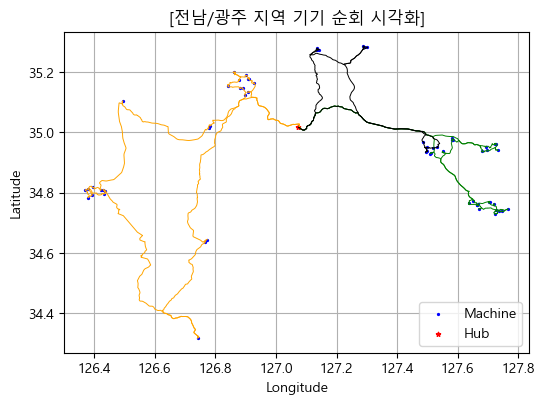

In [83]:
# figsize 비율 계산
ratio = (node_data.latitude.max() - node_data.latitude.min()) / (node_data.longitude.max() - node_data.longitude.min())
scale = 6

# fig, ax 객체 생성
fig, ax = plt.subplots(figsize=(scale, scale * ratio))

# 차량의 color 팔레트 지정
color_pallete = ['green', 'orange', 'black', 'purple', 'olive', 'gray', 'skyblue']

# 데이터 플롯
ax.scatter(node_data['longitude'], node_data['latitude'], s=1.8, c='blue', label='Machine')
ax.scatter(svm.depot.x, svm.depot.y, s=10, c='red', label='Hub', marker='*')

# 축 레이블, 제목 및 범례 설정
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('[전남/광주 지역 기기 순회 시각화]', fontsize=12)
ax.grid()

# 그래프를 보여줍니다.
ax.legend(loc='lower right')

# 각 route를 visualize
for i, route in enumerate(svm.routes):
    route.visualize(ax, JSON_PATH, route_option='trafast', update_sec = 0.05, color = color_pallete[i])

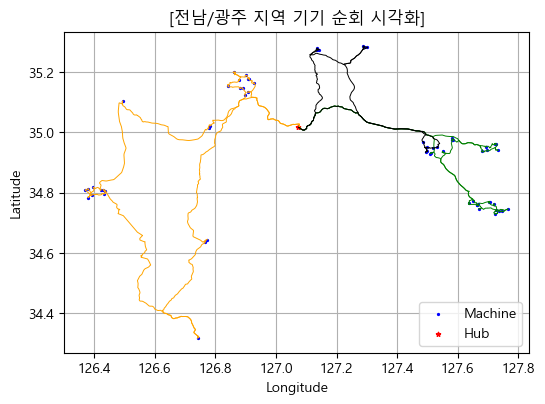

In [84]:
# figsize 비율 계산
ratio = (node_data.latitude.max() - node_data.latitude.min()) / (node_data.longitude.max() - node_data.longitude.min())
scale = 6

# fig, ax 객체 생성
fig, ax = plt.subplots(figsize=(scale, scale * ratio))

# 차량의 color 팔레트 지정
color_pallete = ['green', 'orange', 'black', 'purple', 'olive', 'gray', 'skyblue']

# 데이터 플롯
ax.scatter(node_data['longitude'], node_data['latitude'], s=1.8, c='blue', label='Machine')
ax.scatter(temp_svm.depot.x, temp_svm.depot.y, s=10, c='red', label='Hub', marker='*')

# 축 레이블, 제목 및 범례 설정
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('[전남/광주 지역 기기 순회 시각화]', fontsize=12)
ax.grid()

# 그래프를 보여줍니다.
ax.legend(loc='lower right')

# 각 route를 visualize
for i, route in enumerate(temp_svm.routes):
    route.visualize(ax, JSON_PATH, route_option='trafast', update_sec = 0.05, color = color_pallete[i])